# Average precipitation for one coordinate

160787 6721261
                 time         X          Y     tg  UTM_Zone_33  longitude  \
0 2022-01-01 06:00:00  160500.0  6721500.0  1.019          1.0   8.816323   
2 2022-01-02 06:00:00  160500.0  6721500.0 -4.898          1.0   8.816323   
4 2022-01-03 06:00:00  160500.0  6721500.0 -2.624          1.0   8.816323   
6 2022-01-04 06:00:00  160500.0  6721500.0 -4.463          1.0   8.816323   
8 2022-01-05 06:00:00  160500.0  6721500.0 -9.520          1.0   8.816323   

    latitude    rr     tx         tn        date  
0  60.485966  0.00  2.292  -7.571000  2022-01-01  
2  60.485966  5.61  0.965  -7.206000  2022-01-02  
4  60.485966  0.00  0.574  -6.589000  2022-01-03  
6  60.485966  1.13 -3.278 -11.130000  2022-01-04  
8  60.485966  0.00 -3.868 -16.181999  2022-01-05  
Mean precipitation:  1.7302192
Mean min temperature:  -2.7984056
mean max temperature:  6.705384


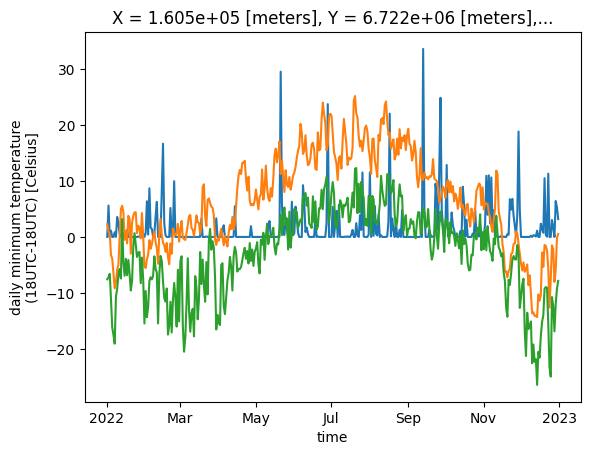

In [ ]:
%matplotlib inline
import xarray as xr
from pyproj import Proj
import pandas as pd
import datetime as dt




#Streamflow gage station location (EPSG:8687)
x,y = (160787, 6721261)
print(x,y)
#Import precipitation and temperature dataset
path = "Data/Climate/seNorge2018_2022.nc"
ds = xr.open_dataset(path)  # NetCDF or OPeNDAP URL

# Extract a dataset closest to specified point
dsloc = ds.sel(Y=y, X=x, method = 'nearest')
PT1=dsloc.to_dataframe()
PT1=PT1.reset_index(0).reset_index(drop=True)
PT1=PT1.drop("time_bnds", axis=1)
#PT1 = PT1.drop_duplicates()
PT1["date"] = pd.to_datetime(PT1["time"]).dt.date
print(PT1.head())
print("Mean precipitation: ", PT1["rr"].groupby(PT1.index).sum().mean())
print("Mean min temperature: ", PT1["tn"].groupby(PT1.index).sum().mean())
print("mean max temperature: ", PT1["tx"].groupby(PT1.index).sum().mean())
# select a variable to plot
dsloc['rr'].plot()
dsloc["tx"].plot()
dsloc["tn"].plot()


# AVerage values for all coordinates in coordinates.txt

In [66]:
import xarray as xr
import pandas as pd
import numpy as np
import pyproj

# Define the UTM projection for zone 33
utm_zone = 33
proj_UTM = pyproj.Proj(proj='utm', zone=utm_zone, ellps='WGS84')

# Read coordinates from coordinates.txt file
coordinates = []
with open('coordinates.txt', 'r') as file:
    for line in file:
        lon, lat = map(float, line.strip().split(','))
        coordinates.append((lon, lat))

# Define lists to store mean values for each location
mean_precipitation = []
mean_min_temperature = []
mean_max_temperature = []
lauf = 0
# Iterate through the first two coordinates
for coord in coordinates:
    lauf +=1
    # Convert longitude and latitude to UTM coordinates
    lon, lat = coord
    utm_x, utm_y = proj_UTM(lon, lat)

    # Extract a dataset closest to the specified point
    dsloc = ds.sel(X=utm_x, Y=utm_y, method='nearest').to_dataframe()

    # Preprocess the DataFrame
    PT1 = dsloc.reset_index(0).reset_index(drop=True)
    PT1 = PT1.drop("time_bnds", axis=1)
    PT1 = PT1.drop_duplicates()
    PT1["date"] = pd.to_datetime(PT1["time"]).dt.date

    # Calculate mean precipitation
    mean_precip = PT1["rr"].groupby(PT1.index).sum().mean()
    mean_precipitation.append(mean_precip)
    print(lauf, mean_precip)

    # Calculate mean minimum temperature
    mean_min_temp = PT1["tn"].groupby(PT1.index).sum().mean()
    mean_min_temperature.append(mean_min_temp)

    # Calculate mean maximum temperature
    mean_max_temp = PT1["tx"].groupby(PT1.index).sum().mean()
    mean_max_temperature.append(mean_max_temp)

# Print mean values over all locations
print(f"Mean precipitation for location: ", np.mean(mean_precipitation))
print(f"Mean min temperature for location: ", np.mean(mean_min_temperature))
print(f"Mean max temperature for location: ", np.mean(mean_max_temperature[i]))


1 8.29852
2 4.2552056
3 1.7154247
4 2.5440547
5 2.1703563
6 1.6250684
7 1.8387672
8 2.4061098
9 7.4700823
10 4.6487126
11 1.7862191
12 7.0212884
13 1.8197807
14 3.611589
15 8.115479
16 4.2438636
17 3.7708497
18 4.255452
19 4.6599455
20 5.901754
21 3.948356
22 7.096685
23 1.4358081
24 6.1993427
25 2.8394794
26 5.505452
27 1.5082467
28 2.5384932
29 1.4369863
30 2.5967124
31 4.107781
32 2.2329588
33 5.838904
34 3.8804386
35 4.0407677
36 1.4123561
37 3.8571236
38 2.6120274
39 6.751178
40 2.5758903
41 2.3308494
42 1.8780547
43 3.7733426
44 1.9616987
45 1.9394519
46 3.5349314
47 3.8075616
48 2.8106847
49 2.2304108
50 2.6356988
51 1.6433972
52 1.9456164
53 2.5369315
54 3.2285755
55 3.2086577
56 3.775315
57 8.57915
58 6.4227123
59 4.755233
60 1.3119179
61 3.6966023
62 1.8427671
63 1.6025479
64 4.9569592
65 1.8802465
66 4.5041094
67 7.374877
68 6.9326024
69 3.6614523
70 5.1909313
71 2.4266574
72 10.109178
73 2.008137
74 4.981205
75 2.411315
76 4.27548
77 1.7334247
78 1.6894522
79 2.4496984
80 6

In [6]:
# PRINT FIRST FEW LINES
# Specify the path to your text file
file_path = 'Data/Climate/seNorge2018_2022.nc'
import netCDF4 as nc

# Open the NetCDF file
nc_file = nc.Dataset(file_path)

# Print the variables (columns)
print("Variables:")
for var in nc_file.variables:
    print(var)

# Print the first 10 lines of each variable
print("\nFirst 10 lines of each variable:")
for var in nc_file.variables:
    print(f"\nVariable: {var}")
    print(nc_file[var][:10])  # Print the first 10 lines of the variable's data



# Print the variable names available in the file
print("Variables available in the file:")
print(nc_file.variables.keys())

# Choose the variable you want to print
variable_name = 'time'

# Get the variable object
variable = nc_file.variables[variable_name]

# Print the variable values
print(f"Values for variable '{variable_name}':")
print(variable[:])


# Close the NetCDF file
nc_file.close()

Variables:
X
Y
time
tg
UTM_Zone_33
longitude
latitude
nv
time_bnds
rr
tx
tn

First 10 lines of each variable:

Variable: X
[-74500. -73500. -72500. -71500. -70500. -69500. -68500. -67500. -66500.
 -65500.]

Variable: Y
[7999500. 7998500. 7997500. 7996500. 7995500. 7994500. 7993500. 7992500.
 7991500. 7990500.]

Variable: time
[1069446. 1069470. 1069494. 1069518. 1069542. 1069566. 1069590. 1069614.
 1069638. 1069662.]

Variable: tg
[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 ...

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ...

In [19]:
import xarray as xr
import pandas as pd

# Streamflow gage station location (EPSG:8687)
x, y = (160787, 6721261)

# Import precipitation and temperature dataset
path = "Data/Climate/seNorge2018_2022.nc"
ds = xr.open_dataset(path)  # NetCDF or OPeNDAP URL

# Extract a dataset closest to specified point
dsloc = ds.sel(Y=y, X=x, method = 'nearest')
PT1=dsloc.to_dataframe()
#print(PT1.head())
PT1=PT1.reset_index(0).reset_index(drop=True)
PT1=PT1.drop("time_bnds", axis=1)
PT1 = PT1.drop_duplicates()
PT1["date"] = pd.to_datetime(PT1["time"]).dt.date
# Print the DataFrame to check if the 'date' column has been added
print(PT1.head())

# Aggregate precipitation data over the time dimension (year)
annual_precipitation = PT1['rr'].groupby(PT1.index).sum()

# Calculate the mean precipitation
mean_annual_precipitation = annual_precipitation.mean()


# Print the mean annual precipitation
print("Mean annual precipitation:")
print(mean_annual_precipitation)



                 time         X          Y     tg  UTM_Zone_33  longitude  \
0 2022-01-01 06:00:00  160500.0  6721500.0  1.019          1.0   8.816323   
2 2022-01-02 06:00:00  160500.0  6721500.0 -4.898          1.0   8.816323   
4 2022-01-03 06:00:00  160500.0  6721500.0 -2.624          1.0   8.816323   
6 2022-01-04 06:00:00  160500.0  6721500.0 -4.463          1.0   8.816323   
8 2022-01-05 06:00:00  160500.0  6721500.0 -9.520          1.0   8.816323   

    latitude    rr     tx         tn        date  
0  60.485966  0.00  2.292  -7.571000  2022-01-01  
2  60.485966  5.61  0.965  -7.206000  2022-01-02  
4  60.485966  0.00  0.574  -6.589000  2022-01-03  
6  60.485966  1.13 -3.278 -11.130000  2022-01-04  
8  60.485966  0.00 -3.868 -16.181999  2022-01-05  
Mean annual precipitation:
1.7302192


AttributeError: 'numpy.float32' object has no attribute 'plot'

UTM X coordinate: 160538.03236991283
UTM Y coordinate: 6721903.335400122


In [53]:
import xarray as xr
import pandas as pd

# Open the NetCDF file
ds = xr.open_dataset("Data/Climate/seNorge2018_2022.nc")

# Convert the dataset to a pandas DataFrame
df = ds.to_dataframe()

# Write the DataFrame to a CSV file
df.to_csv('output.csv')

MemoryError: Unable to allocate 2.52 GiB for an array with shape (365, 1550, 1195) and data type float32